In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,En busca del huevo perdido,1982
1,Blood Loss,2008
2,Anjo do Lodo,1951
3,Jaws 19,2015
4,Lost in Abroad,2012


In [4]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

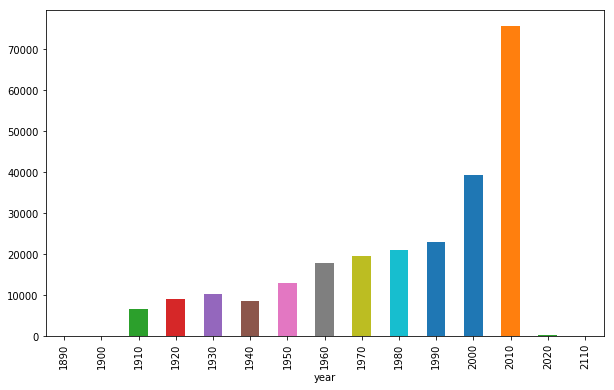

In [5]:
t = titles
t.groupby(t.year // 10 * 10).size().plot(kind='bar', figsize=(10, 6))

### Use groupby() to plot the number of "Hamlet" films made each decade.

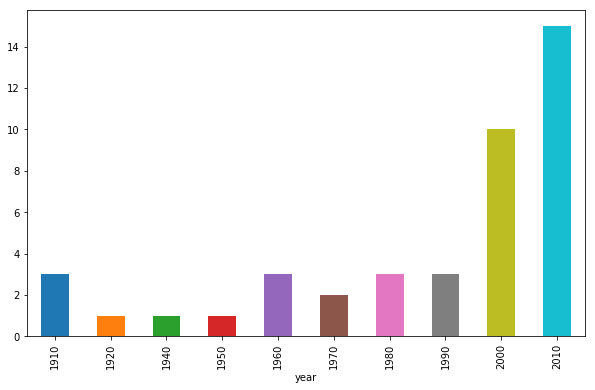

In [6]:
t = t[t.title.str.startswith('Hamlet')]
t.groupby(t.year // 10 * 10).size().plot(kind='bar', figsize=(10, 6))

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [7]:
c = cast
c = c[c.year // 10 * 10 == 1950]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      625
      actress    288
1951  actor      651
      actress    285
1952  actor      613
      actress    304
1953  actor      664
      actress    312
1954  actor      636
      actress    316
1955  actor      648
      actress    285
1956  actor      668
      actress    307
1957  actor      739
      actress    315
1958  actor      715
      actress    301
1959  actor      733
      actress    327
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [8]:
c = cast
c = c[c.year // 10 * 10 == 1950]
c = c[c.n <= 5]
c.groupby(['n', 'type']).size()

n    type   
1.0  actor      6692
     actress    3040
2.0  actor      4640
     actress    4635
3.0  actor      5654
     actress    3201
4.0  actor      5663
     actress    2881
5.0  actor      5674
     actress    2592
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [9]:
c = cast
c = c[c.title.str.contains('Pink Panther')]
c.tail()

,title,year,name,type,character,n
3730761,Revenge of the Pink Panther,1978,Elisabeth Welch,actress,Mrs. Wu,24.0
3731248,The Pink Panther,1963,Meri Welles,actress,Monica Fawn,12.0
3733044,The Pink Panther,2006,Colleen Werthmann,actress,Jane,NaN
3755769,The Pink Panther,2006,Jadin Wong,actress,Granny,NaN
3766595,Revenge of the Pink Panther,1978,Rosita Yarboy,actress,Sam Spade and the Private Eyes,21.0


In [10]:
c.title.unique()

array(['The Pink Panther', 'Revenge of the Pink Panther',
       'Curse of the Pink Panther', 'Son of the Pink Panther',
       'The Return of the Pink Panther', 'The Pink Panther 2',
       'Trail of the Pink Panther', 'The Pink Panther Strikes Again'],
      dtype=object)

In [11]:
c.groupby(['title', 'year'])[['n']].max()

n
title                          year      
Curse of the Pink Panther      1983  63.0
Revenge of the Pink Panther    1978  57.0
Son of the Pink Panther        1993  43.0
The Pink Panther               1963  15.0
                               2006  50.0
The Pink Panther 2             2009  36.0
The Pink Panther Strikes Again 1976  60.0
The Return of the Pink Panther 1975  27.0
Trail of the Pink Panther      1982  32.0

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [12]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['year', 'title']).size()
g

year  title                                         
1979  The Muppet Movie                                  8
1980  Star Wars: Episode V - The Empire Strikes Back    1
      The Blues Brothers                                1
1981  An American Werewolf in London                    2
      The Great Muppet Caper                            6
1982  The Dark Crystal                                  2
1983  Star Wars: Episode VI - Return of the Jedi        1
      Superman III                                      1
      Trading Places                                    1
1984  The Muppets Take Manhattan                        7
1985  Follow That Bird                                  3
      Spies Like Us                                     1
1986  Labyrinth                                         1
1992  Innocent Blood                                    1
      The Muppet Christmas Carol                        7
1996  Muppet Treasure Island                            4
1998  Blues Brother

In [13]:
g[g > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [14]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['character']).size()
g

character
Animal                                                  6
Aughra, a Keeper Of Secrets (performer)                 1
Bert                                                    3
Brain Surgeon                                           1
Chamberlain (performer)                                 1
Cookie Monster                                          5
Corrections Officer                                     1
Corrupt Cop                                             1
Doc Hopper's Men                                        1
Fozzie                                                  1
Fozzie Bear                                             4
Fozzie Bear as Fozziewig                                1
Fungus                                                  1
George the Janitor                                      1
Gramps                                                  1
Grover                                                  2
Horse and Carriage Driver                               1
Marv

In [15]:
g[g >= 2]

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64

## Scratch Pad

In [16]:
c = cast
c = c[c.n == 1]
g = c.groupby([(c.year // 10 * 10), 'type'])
g.size()

year  type   
1900  actor          5
      actress        1
1910  actor       2454
      actress     2782
1920  actor       4603
      actress     3078
1930  actor       6238
      actress     2893
1940  actor       5346
      actress     2256
1950  actor       6692
      actress     3040
1960  actor       8320
      actress     3503
1970  actor       9033
      actress     3713
1980  actor       9721
      actress     3610
1990  actor      11076
      actress     4301
2000  actor      18557
      actress     7787
2010  actor      23021
      actress    11199
2020  actor          4
dtype: int64

In [17]:
c = cast
c = c[(c.character == 'Kermit the Frog') | (c.character == 'Oscar the Grouch')]
c

,title,year,name,type,character,n
982460,An American Werewolf in London,1981,Jim Henson,actor,Kermit the Frog,18.0
982461,Follow That Bird,1985,Jim Henson,actor,Kermit the Frog,2.0
982466,The Great Muppet Caper,1981,Jim Henson,actor,Kermit the Frog,1.0
982474,The Muppet Movie,1979,Jim Henson,actor,Kermit the Frog,1.0
982481,The Muppets Take Manhattan,1984,Jim Henson,actor,Kermit the Frog,1.0
2156611,Follow That Bird,1985,Caroll Spinney,actor,Oscar the Grouch,1.0
2156614,Night at the Museum: Battle of the Smithsonian,2009,Caroll Spinney,actor,Oscar the Grouch,40.0
2156618,The Adventures of Elmo in Grouchland,1999,Caroll Spinney,actor,Oscar the Grouch,14.0
2156619,The Great Muppet Caper,1981,Caroll Spinney,actor,Oscar the Grouch,20.0
2438010,Mr. Magorium's Wonder Emporium,2007,Steve Whitmire,actor,Kermit the Frog,8.0


In [18]:
g = c.groupby(['character'])
g.size()

character
Kermit the Frog     9
Oscar the Grouch    4
dtype: int64

In [19]:
g = c.groupby(['character', (c.year // 10 * 10)])
g = g.size()

In [20]:
g.unstack('year')

year,1970,1980,1990,2000,2010
character,,,,,
Kermit the Frog,1.0,4.0,2.0,1.0,1.0
Oscar the Grouch,NaN,2.0,1.0,1.0,NaN


In [21]:
g.unstack('character')

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,NaN
1980,4.0,2.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,NaN


In [22]:
g.reset_index()

,character,year,0
0,Kermit the Frog,1970,1
1,Kermit the Frog,1980,4
2,Kermit the Frog,1990,2
3,Kermit the Frog,2000,1
4,Kermit the Frog,2010,1
5,Oscar the Grouch,1980,2
6,Oscar the Grouch,1990,1
7,Oscar the Grouch,2000,1


In [23]:
g.unstack()

year,1970,1980,1990,2000,2010
character,,,,,
Kermit the Frog,1.0,4.0,2.0,1.0,1.0
Oscar the Grouch,NaN,2.0,1.0,1.0,NaN


In [24]:
g.unstack(1)

year,1970,1980,1990,2000,2010
character,,,,,
Kermit the Frog,1.0,4.0,2.0,1.0,1.0
Oscar the Grouch,NaN,2.0,1.0,1.0,NaN


In [25]:
u = g.unstack(0)
u

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,NaN
1980,4.0,2.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,NaN


In [26]:
# Gaps as NaN
u['difference'] = u['Kermit the Frog'] - u['Oscar the Grouch']
u

character,Kermit the Frog,Oscar the Grouch,difference
year,,,
1970,1.0,NaN,NaN
1980,4.0,2.0,2.0
1990,2.0,1.0,1.0
2000,1.0,1.0,0.0
2010,1.0,NaN,NaN


In [27]:
u = g.unstack('character').fillna(0)
u['difference'] = u['Kermit the Frog'] - u['Oscar the Grouch']
u

character,Kermit the Frog,Oscar the Grouch,difference
year,,,
1970,1.0,0.0,1.0
1980,4.0,2.0,2.0
1990,2.0,1.0,1.0
2000,1.0,1.0,0.0
2010,1.0,0.0,1.0


THE DANGERS OF UNSTACK

Do it again?  Oh no, we get a series!

.stack() again to repair damage, BUT can devolve to series again.


In [28]:
# DANGERS OF UNSTACK
g.unstack('character').unstack('year')

character         year
Kermit the Frog   1970    1.0
                  1980    4.0
                  1990    2.0
                  2000    1.0
                  2010    1.0
Oscar the Grouch  1970    NaN
                  1980    2.0
                  1990    1.0
                  2000    1.0
                  2010    NaN
dtype: float64

In [29]:
g.unstack('character').stack('character')

year  character       
1970  Kermit the Frog     1.0
1980  Kermit the Frog     4.0
      Oscar the Grouch    2.0
1990  Kermit the Frog     2.0
      Oscar the Grouch    1.0
2000  Kermit the Frog     1.0
      Oscar the Grouch    1.0
2010  Kermit the Frog     1.0
dtype: float64

In [30]:
# Convencies that unstack moves column index upwards to row index
df = g.unstack('character')
df['extra'] = 1
df = df.set_index('extra', append=True)
df.unstack(0)

character Kermit the Frog                     Oscar the Grouch                 \
year                 1970 1980 1990 2000 2010             1970 1980 1990 2000   
extra                                                                           
1                     1.0  4.0  2.0  1.0  1.0              NaN  2.0  1.0  1.0   

character       
year      2010  
extra           
1          NaN

#### PLOTTING 

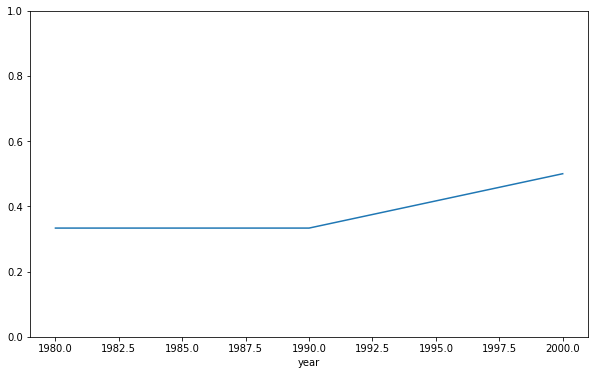

In [31]:
u = g.unstack('character')
total = u['Oscar the Grouch'] + u['Kermit the Frog']
u['difference'] = u['Oscar the Grouch'] / total
u.difference.plot(ylim=[0,1], figsize=(10, 6))